In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
retail=pd.read_csv('C:/Users/bharat.sakarwal/Downloads/Upgrad_new/Online_Retail.csv',encoding='iso-8859-1',header=0)

In [62]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


### Steps required broadly:
1. Read and visualize the data.
2. Clean the data.
3. prepare the data for modelling.
4. Modelling
5. Analysis and Business Recommendation

In [63]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [64]:
retail['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [65]:
len(retail)

541909

In [26]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
round((100*(retail.isnull().sum())/len(retail)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [66]:
retail.dropna(subset=['CustomerID'],inplace=True)

In [67]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [68]:
retail.shape

(406829, 8)

In [69]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Prepare Data for Modelling
R(Recency): Number of days since last purchase
F(Frequency): Number of transactions
M(Monetary): Total amount contributed

In [70]:
#new_retail['Total Amount']=(new_retail['Quantity'])*(new_retail['UnitPrice'])
retail['amount'] = retail['Quantity']*retail['UnitPrice']

In [71]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [74]:
g=retail.groupby('Country')

In [102]:
g=retail.groupby('Country')                        #which country is giving highest maximum sale by a particular customer
g.max().sort_values(by='amount',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,amount
Country,,,,,,,,
United Kingdom,C581569,POST,ZINC WIRE SWEETHEART LETTER TRAY,80995,9/9/2011 9:52,38970.00,18287.0,168469.60
Netherlands,C577481,POST,ZINC WILLIE WINKIE CANDLE STICK,2400,9/9/2011 12:24,206.40,14646.0,4992.00
France,C581316,POST,ZINC T-LIGHT HOLDER STARS SMALL,912,9/9/2011 8:48,4161.06,14277.0,4161.06
Singapore,C571750,M,ZINC FOLKART SLEIGH BELLS,288,5/4/2011 10:58,3949.32,12744.0,3949.32
Japan,C580832,M,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2040,9/2/2011 11:21,45.57,12812.0,3794.40
EIRE,C580056,M,ZINC WIRE SWEETHEART LETTER TRAY,1440,9/9/2011 11:57,1687.17,14911.0,2365.20
Australia,C574344,POST,YELLOW GIANT GARDEN THERMOMETER,1152,9/3/2011 15:47,350.00,16321.0,1718.40
Spain,C581148,POST,ZINC T-LIGHT HOLDER STARS SMALL,360,9/6/2011 16:04,1715.85,17097.0,1350.00
Portugal,C581128,POST,ZINC WIRE KITCHEN ORGANISER,120,9/12/2010 10:55,1241.98,12811.0,1241.98


In [90]:
retail[retail['CustomerID']==16321.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
64609,541657,22087,PAPER BUNTING WHITE LACE,6,20-01-2011 12:11,2.95,16321.0,Australia,17.70
64610,541657,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,20-01-2011 12:11,2.95,16321.0,Australia,17.70
64611,541657,21056,DOCTOR'S BAG SOFT TOY,3,20-01-2011 12:11,8.95,16321.0,Australia,26.85
64612,541657,22960,JAM MAKING SET WITH JARS,6,20-01-2011 12:11,4.25,16321.0,Australia,25.50
84270,543372,22087,PAPER BUNTING WHITE LACE,18,7/2/2011 15:01,2.95,16321.0,Australia,53.10
84271,543372,22325,MOBILE VINTAGE HEARTS,3,7/2/2011 15:01,4.95,16321.0,Australia,14.85
84299,C543375,22325,MOBILE VINTAGE HEARTS,-3,7/2/2011 15:09,4.95,16321.0,Australia,-14.85
84300,C543375,22087,PAPER BUNTING WHITE LACE,-18,7/2/2011 15:09,2.95,16321.0,Australia,-53.10
84301,543376,22325,MOBILE VINTAGE HEARTS,3,7/2/2011 15:10,4.95,16321.0,Australia,14.85
84302,543376,22087,PAPER BUNTING WHITE LACE,18,7/2/2011 15:10,2.95,16321.0,Australia,53.10


In [110]:
g.sum().sort_values('amount',ascending=False)['amount']   # order of countries by highest sales

C:\Users\bharat.sakarwal\AppData\Local\Temp\ipykernel_39112\3865889485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.sum().sort_values('amount',ascending=False)['amount'] #which country is giving highest sales


Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

In [111]:
c=retail.groupby('CustomerID')

In [121]:
c.sum().sort_values('amount',ascending=False)   #

C:\Users\bharat.sakarwal\AppData\Local\Temp\ipykernel_39112\3319753872.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c.sum().sort_values('amount',ascending=False)


,Quantity,UnitPrice,amount
CustomerID,,,
14646.0,196719,5400.21,279489.02
18102.0,64122,5159.73,256438.49
17450.0,69029,3320.09,187482.17
14911.0,77180,31060.66,132572.62
12415.0,77242,2499.82,123725.45
...,...,...,...
12503.0,-1,1126.00,-1126.00
17603.0,-31,1156.89,-1165.30
14213.0,-244,24.45,-1192.20


In [128]:
freq=c['InvoiceNo'].count().sort_values(ascending=False)   #Transaction of customers from max to min on basis of customer id

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14119.0       1
13747.0       1
15590.0       1
15562.0       1
17925.0       1
Name: InvoiceNo, Length: 4372, dtype: int64

#### Megre 2 Data Frames with frequency(no. of transaction) and amount paid by customer

In [133]:
customer_group=retail.groupby('CustomerID')['amount'].sum()

In [134]:
cus_count=retail.groupby('CustomerID')['InvoiceNo'].count()

In [138]:
customer_group=customer_group.reset_index()
cus_count=cus_count.reset_index()

In [142]:
cus_count.columns=['CustomerID','frequency']

In [140]:
customer_group.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [143]:
cus_count.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [144]:
customer_group=pd.merge(customer_group,cus_count,on='CustomerID',how='inner')

In [147]:
customer_group.sort_values('amount',ascending=False).head()

,CustomerID,amount,frequency
1703,14646.0,279489.02,2085
4233,18102.0,256438.49,433
3758,17450.0,187482.17,351
1895,14911.0,132572.62,5903
55,12415.0,123725.45,778


In [148]:
customer_group.sort_values('frequency',ascending=False).head()

,CustomerID,amount,frequency
4042,17841.0,40340.78,7983
1895,14911.0,132572.62,5903
1300,14096.0,57120.91,5128
330,12748.0,29072.10,4642
1674,14606.0,11713.85,2782


In [178]:
retail.head(2)
#retail.info()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


In [152]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])

In [160]:
max_date=retail['InvoiceDate'].max()

In [ ]:
retail['diff']=

In [166]:
max_date

Timestamp('2011-12-10 17:19:00')

In [177]:
retail['diff'] = max_date - retail['InvoiceDate']

In [173]:
retail['diff']=pd.to_datetime(retail['InvoiceDate']).dt.day

In [175]:
#retail=retail.drop('diff',axis=1)

In [180]:
recency=retail.groupby('CustomerID')['diff'].min()

In [186]:
recency=recency.reset_index()

In [188]:
recency.head(2)

,CustomerID,diff
0,12346.0,326 days 07:02:00
1,12347.0,40 days 04:54:00


In [190]:
customer_group=pd.merge(customer_group,recency,on='CustomerID',how='inner')

In [192]:
customer_group.columns

Index(['CustomerID', 'amount', 'frequency', 'diff'], dtype='object')

In [194]:
#customer_group.columns=['CustomerID', 'amount', 'frequency', 'recency']
customer_group=customer_group.rename(columns={'diff':'recency'})

In [243]:
customer_group.head(2)
customer_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   amount      4372 non-null   float64
 2   frequency   4372 non-null   int64  
 3   recency     4372 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 299.8 KB


In [201]:
#pd.to_datetime(customer_group['recency']).dt.day
customer_group['recency']=customer_group['recency'].dt.days

In [205]:
import seaborn as sns

<Axes: >

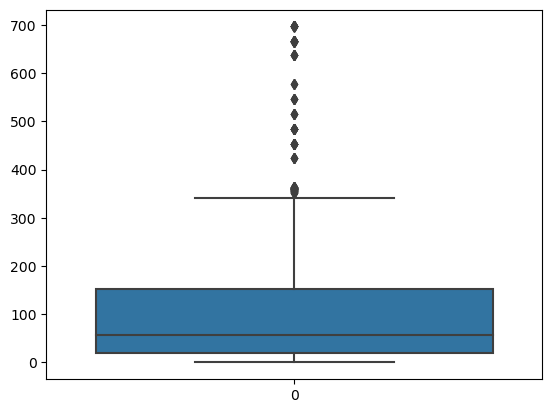

In [206]:
sns.boxplot(customer_group['recency'])

In [216]:
recency_95=np.percentile(customer_group['recency'],95)
recency_5=np.percentile(customer_group['recency'],5)

In [223]:
IQR_recency=recency_95-recency_5
IQR_recency

311.0

In [228]:
ur=recency_95+(1.5*IQR_recency)
ur

780.5

In [229]:
lr=recency_5-(1.5*IQR_recency)
lr

-463.5

In [226]:
Q1 = customer_group.recency.quantile(0.05)
Q3 = customer_group.recency.quantile(0.95)
IQR = Q3 - Q1

In [238]:
IQR
print(Q3+(1.5*IQR))
print(Q1-(1.5*IQR))

780.5
-463.5


In [237]:
customer_group[(customer_group['recency']>ur) & (customer_group['recency']<lr)]

,CustomerID,amount,frequency,recency


In [252]:
customer_group1=customer_group

#### Outlier Treatment for Amount

In [253]:
Q1 = customer_group.amount.quantile(0.05)
Q3 = customer_group.amount.quantile(0.95)
IQR = Q3 - Q1
lr=Q1-(1.5*IQR)
ur=Q3+(1.5*IQR)
customer_group1=customer_group1[(customer_group['amount']<ur) & (customer_group1['amount']>lr)]

In [254]:
customer_group1.shape

(4313, 4)

#### Outlier Treatment for Frequency

In [255]:
Q1 = customer_group.frequency.quantile(0.05)
Q3 = customer_group.frequency.quantile(0.95)
IQR = Q3 - Q1
lr=Q1-(1.5*IQR)
ur=Q3+(1.5*IQR)
customer_group1=customer_group1[(customer_group['frequency']<ur) & (customer_group1['frequency']>lr)]

C:\Users\bharat.sakarwal\AppData\Local\Temp\ipykernel_39112\3035614585.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer_group1=customer_group1[(customer_group['frequency']<ur) & (customer_group1['frequency']>lr)]


In [256]:
customer_group1.shape

(4296, 4)

#### Outlier Treatment for Recency

In [257]:
Q1 = customer_group.recency.quantile(0.05)
Q3 = customer_group.recency.quantile(0.95)
IQR = Q3 - Q1
lr=Q1-(1.5*IQR)
ur=Q3+(1.5*IQR)
customer_group1=customer_group1[(customer_group['recency']<ur) & (customer_group1['recency']>lr)]

C:\Users\bharat.sakarwal\AppData\Local\Temp\ipykernel_39112\903054170.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer_group1=customer_group1[(customer_group['recency']<ur) & (customer_group1['recency']>lr)]


In [258]:
customer_group1.shape

(4296, 4)

In [296]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [280]:
rfm_df=customer_group1[['amount','frequency','recency']]
rfm_df.columns

Index(['amount', 'frequency', 'recency'], dtype='object')

In [281]:
scaler=StandardScaler()

In [284]:
rfm_df_scaled=scaler.fit_transform(rfm_df)

In [287]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled,columns=['amount', 'frequency', 'recency'])

In [286]:
rfm_df_scaled.shape

(4296, 3)

In [288]:
rfm_df_scaled

,amount,frequency,recency
0,-0.724074,-0.746158,1.955456
1,1.727712,1.022120,-0.546491
2,0.298304,-0.461269,-0.231561
3,0.275726,-0.048671,-0.730201
4,-0.533847,-0.598801,1.824235
...,...,...,...
4291,-0.621338,-0.667568,0.503277
4292,-0.678099,-0.697039,-0.861422
4293,-0.623613,-0.638096,-0.082844
4294,0.467619,6.660959,-0.808933


# Check Hopkins Score

In [289]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [295]:
hopkins(rfm_df_scaled)

0.9724020284973958

## Modeling

In [297]:
KMeans?

In [300]:
kmeans=KMeans(n_clusters=4,max_iter=50)

In [307]:
kmeans.fit(rfm_df_scaled)

C:\Users\bharat.sakarwal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [306]:
len(kmeans.labels_)  #predicted values

4296

In [320]:
KMeans?

### Plot Elbow curve/ SSD(sum of square distance from their respective centroids-inertia)

In [337]:
ssd=[]
n_clusters=[2,3,4,5,6,7,8]

In [336]:
del ssd

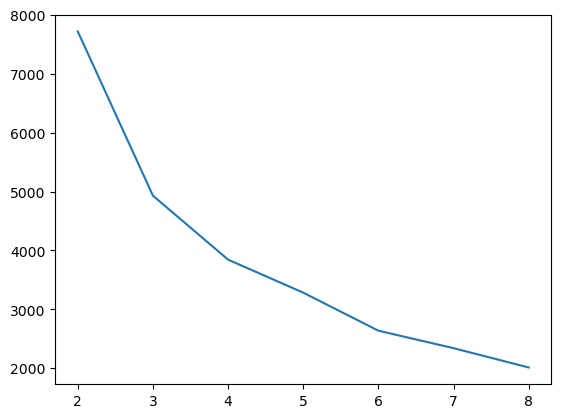

In [338]:
for num_clusters in n_clusters:
    kmeans=KMeans(init='k-means++',n_init='auto',n_clusters=num_clusters,max_iter=50)
    #kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range(2,9),ssd)

### Silhouettte Score

In [ ]:
n_clusters=[2,3,4,5,6,7,8]

In [339]:
silhouette_score?

In [351]:
for num_clusters in n_clusters:
    kmeans=KMeans(init='k-means++',n_init='auto',n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels=kmeans.labels_
    
    avg_silhouette=silhouette_score(rfm_df_scaled,cluster_labels)
    print("Silhouette Score of {} clusters is :{}".format(num_clusters,avg_silhouette))

Silhouette Score of 2 clusters is :0.5522698109391468
Silhouette Score of 3 clusters is :0.4709929152541021
Silhouette Score of 4 clusters is :0.44660269421087945
Silhouette Score of 5 clusters is :0.43185902983176366
Silhouette Score of 6 clusters is :0.45154047543144626
Silhouette Score of 7 clusters is :0.3307388566681738
Silhouette Score of 8 clusters is :0.39534907926466534


In [353]:
customer_group.head(2)

,CustomerID,amount,frequency,recency
0,12346.0,0.0,2,326
1,12347.0,4310.0,182,40


In [ ]:
#### Proceeding ahead with optimal no. of cluster

In [354]:
kmeans=KMeans(init='k-means++',n_init='auto',n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)
cluster_labels=kmeans.labels_

In [357]:
customer_group1['Clusters']=cluster_labels

In [358]:
customer_group1.head()

,CustomerID,amount,frequency,recency,Clusters
0,12346.0,0.00,2,326,2
1,12347.0,4310.00,182,40,0
2,12348.0,1797.24,31,76,1
3,12349.0,1757.55,73,19,1
4,12350.0,334.40,17,311,2


<Axes: xlabel='Clusters', ylabel='frequency'>

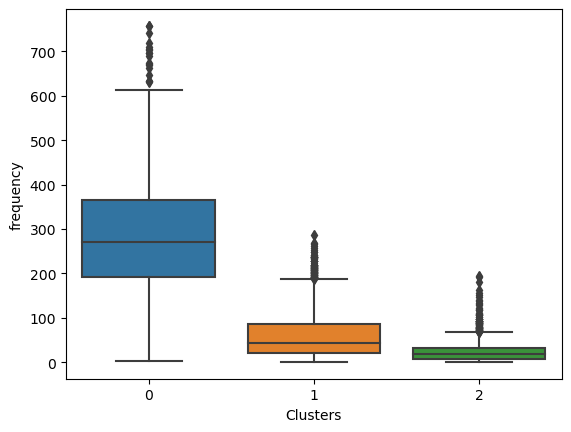

In [361]:
sns.boxplot(x='Clusters',y='frequency',data=customer_group1)  #cluster representations

<Axes: xlabel='Clusters', ylabel='recency'>

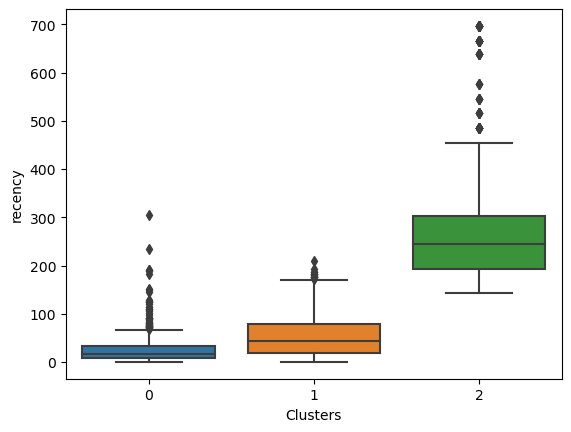

In [362]:
sns.boxplot(x='Clusters',y='recency',data=customer_group1)

<Axes: xlabel='Clusters', ylabel='amount'>

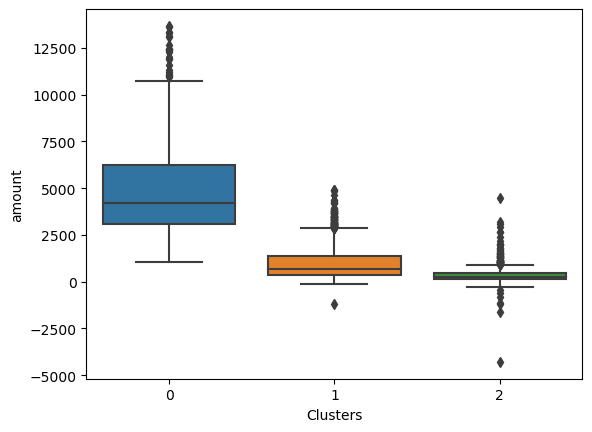

In [363]:
sns.boxplot(x='Clusters',y='amount',data=customer_group1)